In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import seaborn as sns


In [2]:
# Load LFW dataset (only people with >=50 images)
lfw = fetch_lfw_people(min_faces_per_person=50, resize=0.4, color=True)
X = lfw.images
y = lfw.target
names = lfw.target_names

print("Available persons:", names[:10])   # print first 10 names
print("Dataset shape:", X.shape)
print("Number of classes:", len(names))

Available persons: ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Jacques Chirac' 'Jean Chretien'
 'John Ashcroft' 'Junichiro Koizumi']
Dataset shape: (1560, 50, 37, 3)
Number of classes: 12


In [3]:
# Choose Person A (most frequent in dataset)
person_name = "George W Bush"
person_id = np.where(names == person_name)[0][0]

# Binary labels: 1 = Person A, 0 = Others
y_binary = (y == person_id).astype(int)

# Normalize image pixels
X = X / 255.0

X

array([[[[1.5840061e-03, 1.2764322e-03, 8.7658595e-04],
         [1.7377932e-03, 1.4302192e-03, 1.0149943e-03],
         [2.1376396e-03, 1.8146867e-03, 1.3687044e-03],
         ...,
         [1.1687813e-03, 8.9196465e-04, 3.5371011e-04],
         [1.2610535e-03, 1.0611304e-03, 5.5363326e-04],
         [1.4609765e-03, 1.3225683e-03, 8.1507111e-04]],

        [[1.6916571e-03, 1.3994618e-03, 9.8423695e-04],
         [1.8300654e-03, 1.5378700e-03, 1.0611304e-03],
         [1.9377163e-03, 1.6301422e-03, 1.1226452e-03],
         ...,
         [1.1380239e-03, 8.3044986e-04, 2.6143793e-04],
         [1.0149943e-03, 7.9969241e-04, 2.7681663e-04],
         [1.3687044e-03, 1.2149174e-03, 7.0742023e-04]],

        [[1.7531719e-03, 1.4917339e-03, 1.0611304e-03],
         [1.8146867e-03, 1.5224913e-03, 1.0457517e-03],
         [1.6608997e-03, 1.3379470e-03, 8.3044986e-04],
         ...,
         [1.3687044e-03, 1.0303730e-03, 4.4598232e-04],
         [1.0457517e-03, 7.8431371e-04, 2.7681663e-04],
  

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)

# Reshape for CNN (add channel dimension)
X_train = X_train.reshape(-1, X_train.shape[1], X_train.shape[2], 3)
X_test  = X_test.reshape(-1, X_test.shape[1], X_test.shape[2], 3)

print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)


Train set: (1248, 50, 37, 3) (1248,)
Test set: (312, 50, 37, 3) (312,)


In [5]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 3)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')   # binary output
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


c:\Users\shubh\Downloads\AI ML\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 35, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 17, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 11, 7, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4928)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       630,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 650,433 (2.48 MB)

 Trainable params: 650,433 (2.48 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test)
)


Epoch 1/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6212 - loss: 0.6681 - val_accuracy: 0.6603 - val_loss: 0.6422
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6670 - loss: 0.6396 - val_accuracy: 0.6603 - val_loss: 0.6503
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6711 - loss: 0.6443 - val_accuracy: 0.6603 - val_loss: 0.6439
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6805 - loss: 0.6326 - val_accuracy: 0.6603 - val_loss: 0.6483
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6629 - loss: 0.6465 - val_accuracy: 0.6603 - val_loss: 0.6413
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6620 - loss: 0.6499 - val_accuracy: 0.6603 - val_loss: 0.6410
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6643 - loss: 0.6404 - val_accuracy: 0.6603 - val_loss: 0.6415
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6700 - loss: 0.6375 - val_accuracy: 0.6603 - v

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6249 - loss: 0.6652 
Test Accuracy: 66.03%


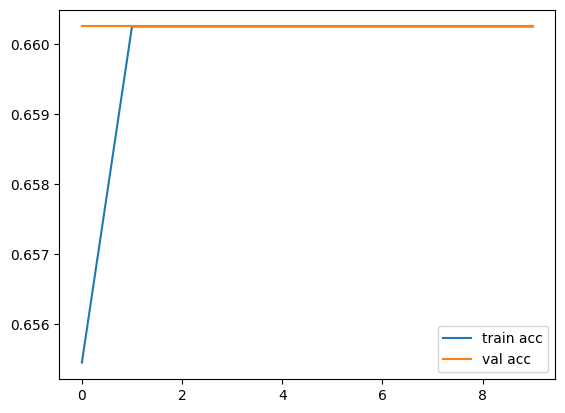

In [7]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc*100:.2f}%")

# Plot training curve
plt.plot(history.history['accuracy'], label="train acc")
plt.plot(history.history['val_accuracy'], label="val acc")
plt.legend(); plt.show()


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

Classification Report:

               precision    recall  f1-score   support

       Others       0.66      1.00      0.80       206
George W Bush       0.00      0.00      0.00       106

     accuracy                           0.66       312
    macro avg       0.33      0.50      0.40       312
 weighted avg       0.44      0.66      0.53       312



c:\Users\shubh\Downloads\AI ML\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\shubh\Downloads\AI ML\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\shubh\Downloads\AI ML\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


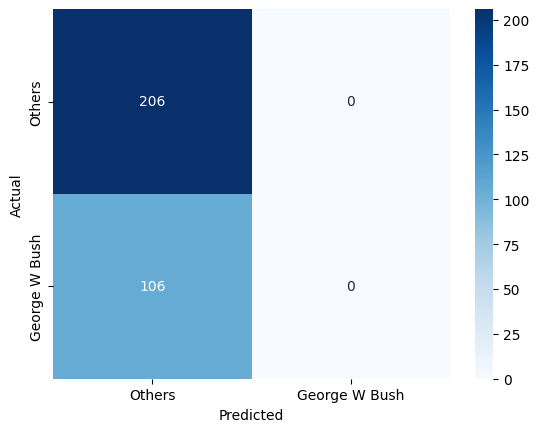

In [8]:
y_pred = (model.predict(X_test) > 0.5).astype(int)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Others", person_name]))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Others", person_name],
            yticklabels=["Others", person_name])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [9]:
model.save("face_binary_model.h5")


In [10]:
import numpy as np
import cv2
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Load LFW dataset
lfw = fetch_lfw_people(min_faces_per_person=20, resize=0.4, color=False)

X = lfw.images
y_names = lfw.target_names[lfw.target]

# Binary classification: "George W Bush" vs "Others"
target_person = "George W Bush"
y = np.array([1 if name == target_person else 0 for name in y_names])  # 1=PersonA, 0=Others

# Normalize
X = X / 255.0
X = np.expand_dims(X, -1)   # (n, h, w, 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encode
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

print("Dataset shape:", X.shape)
print("Classes:", np.unique(y, return_counts=True))


Dataset shape: (3023, 50, 37, 1)
Classes: (array([0, 1]), array([2493,  530], dtype=int64))


In [11]:
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=X.shape[1:]),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(2, activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()


c:\Users\shubh\Downloads\AI ML\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 48, 35, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 24, 17, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 22, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 11, 7, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4928)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       630,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 649,986 (2.48 MB)

 Trainable params: 649,986 (2.48 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=10, batch_size=32, verbose=1)


Epoch 1/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8204 - loss: 0.5366 - val_accuracy: 0.8397 - val_loss: 0.4408
Epoch 2/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8169 - loss: 0.4842 - val_accuracy: 0.8397 - val_loss: 0.4409
Epoch 3/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8294 - loss: 0.4657 - val_accuracy: 0.8397 - val_loss: 0.4451
Epoch 4/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8124 - loss: 0.4946 - val_accuracy: 0.8397 - val_loss: 0.4404
Epoch 5/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8277 - loss: 0.4669 - val_accuracy: 0.8397 - val_loss: 0.4474
Epoch 6/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8177 - loss: 0.4782 - val_accuracy: 0.8397 - val_loss: 0.4422
Epoch 7/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8283 - loss: 0.4666 - val_accuracy: 0.8397 - val_loss: 0.4568
Epoch 8/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8147 - loss: 0.4887 - val_accuracy: 0.8397 - v

In [13]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc*100:.2f}%")


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8414 - loss: 0.4387
Test Accuracy: 83.97%


In [14]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
cap = cv2.VideoCapture(0)

img_height, img_width = X.shape[1:3]   # match training dataset shape

while True:
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in faces:
        face = gray[y:y+h, x:x+w]
        face = cv2.resize(face, (img_width, img_height)) / 255.0
        face = np.expand_dims(face, axis=(0,-1))

        prediction = model.predict(face, verbose=0)
        label = target_person if np.argmax(prediction)==1 else "Others"
        
        cv2.rectangle(frame, (x,y), (x+w,y+h), (255,0,0), 2)
        cv2.putText(frame, label, (x,y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)

    cv2.imshow("Face Recognition (Binary)", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
